  Python script template for Question 1 (IAML Level 10)
  
  Note that:
  - You should not change the filename of this file, 'iaml01cw2_q1.py', which is the file name you should use when you submit your code for this question.
  - You should define the functions shown below in your code.
  - You can define function arguments (parameters) and returns (attributes) if necessary.
  - In case you define helper functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.
  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
  - You do not need to include this header in your submission

In [1]:
import os
import numpy as np
import scipy
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import import_ipynb
from iaml01cw2_helpers import *
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import math

importing Jupyter notebook from iaml01cw2_helpers.ipynb


C:\Users\wotja\miniconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
#--- Code for loading the data set and pre-processing --->
#load data
DataPath = os.path.join(os.getcwd(), 'data')
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST(DataPath)

#Step 1 Make a back up of Xtrn and Xtst by copying Xtrn to Xtrn_orig and Xtst to Xtst_orig
Xtrn_orig = Xtrn.copy() #or deepcopy?
Xtst_orig = Xtst.copy()

#Step 2 Divide each element of Xtrn and Xtst by 255.0. (NB: Xtrn and Xtst are overwritten as a result.)
Xtrn = np.divide(Xtrn,255)
Xtst = np.divide(Xtst,255)
#Xtrn = Xtrn/255


#Step 3 Calculate the mean value of Xtrn for each dimension (i.e. column) and store the
#result in a vector, Xmean, whose shape is (784,).
Xmean = np.mean(Xtrn, axis=0)
#Xmean.shape

#Step 4 Subtract Xmean from each row of Xtrn and Xtst, and store the result in Xtrn_nm
#and Xtst_nm, respectively.
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean

In [3]:
# Q1.1
def iaml01cw2_q1_1():
    #first 4 elements of first and last training sample
    print(Xtrn_nm[0,:][0:4])
    print(Xtrn_nm[-1,:][0:4])

iaml01cw2_q1_1()   # comment this out when you run the function


[-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]
[-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]


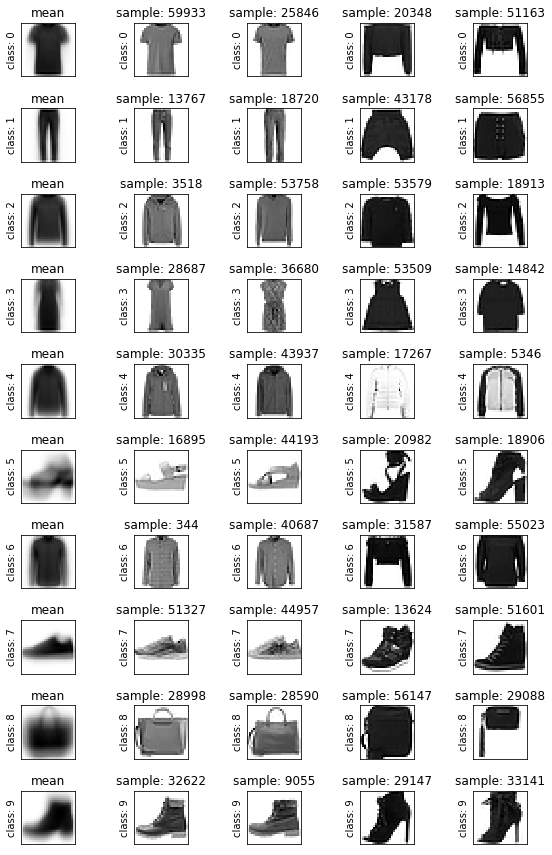

In [4]:
# Q1.2
def iaml01cw2_q1_2():
    #Find the mean vector for each class
    meanClass = np.zeros((10, 784))
    for i in range(10):
        meanClass[i] = np.mean(Xtrn[Ytrn==i], axis=0)
    #meanClass.shape
    
    #Form a matrix containing the distances of each sample to the mean vector of its class
    dists = []
    indexes = [] #holds which sample each dist came from
    for i in range(10):
        dist = []
        for j in range(Xtrn.shape[0]): #for each row, i.e. 60000
            d = 0
            if (Ytrn[j] == i): #if that row is part of current class
                #for each row of Xtrn that is in the class calc euc.dist. to mean vec of that class
                d = np.linalg.norm(meanClass[i]-Xtrn[j]) 
                dist.append(d)
                indexes.append(j)
        dists.append(dist)
    dists = np.asarray(dists)
    dists.shape
    indexes = np.asarray(indexes).reshape(10,6000)
    
    ##Find 2 closest and 2 furthest samples for each class and get their indexes
    imgVec = []
    c = 0
    idx = []
    for data in dists:#for each class
        classVec = []

        data_sort = np.sort(data)
        min1 = data_sort[0]
        min2 = data_sort[1]
        max1 = data_sort[-1]
        max2 = data_sort[-2]

        min1_ind = indexes[c][np.where(data == min1)]
        min2_ind = indexes[c][np.where(data == min2)]
        max1_ind = indexes[c][np.where(data == max1)]
        max2_ind = indexes[c][np.where(data == max2)]

        #Append in column order: Mean, 1Close, 2Close, 2Far, 1Far
        classVec.append(meanClass[c])
        classVec.append(Xtrn[min1_ind])
        classVec.append(Xtrn[min2_ind])
        classVec.append(Xtrn[max2_ind])
        classVec.append(Xtrn[max1_ind])

        idx.append(min1_ind)
        idx.append(min2_ind)
        idx.append(max2_ind)
        idx.append(max1_ind)

        imgVec.append(classVec)
        c += 1
    imgVec = np.asarray(imgVec)
    idx = np.asarray(idx).reshape(10,4)
    
    #Plot images
    f, axarr = plt.subplots(10,5, figsize = (8,12))
    f.tight_layout()

    for i in range(10):
        for j in range(5):
            imgVec[i][j] = imgVec[i][j].reshape(28,28)
            axarr[i,j].imshow(imgVec[i][j], cmap = 'gray_r')
            axarr[i,j].set_ylabel("class: {}".format(i))
            if (j == 0):
                axarr[i,j].set_title("mean")
            else:
                axarr[i,j].set_title("sample: {}".format(idx[i][j-1]))

            axarr[i,j].get_xaxis().set_ticks([])
            axarr[i,j].get_yaxis().set_ticks([])  

iaml01cw2_q1_2()

In [10]:
# Q1.3
def iaml01cw2_q1_3():
    #find variance of first 5 PC's
    pca = PCA()
    pca.fit(Xtrn_nm)
    evar = pca.explained_variance_[:5]
    i = 1
    for var in evar:
        print('Explained Variance for PC{}: {:.3f}'.format(i,var))
        i += 1

iaml01cw2_q1_3()   # comment this out when you run the function

Explained Variance for PC1: 19.810
Explained Variance for PC2: 12.112
Explained Variance for PC3: 4.106
Explained Variance for PC4: 3.382
Explained Variance for PC5: 2.625


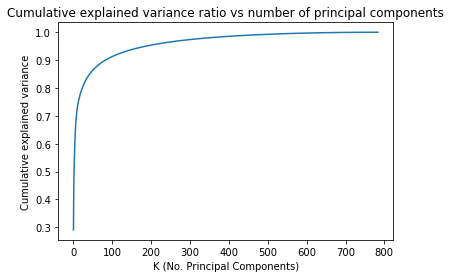

In [17]:
# Q1.4
def iaml01cw2_q1_4():
    pca = PCA()
    pca.fit(Xtrn_nm)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.title("Cumulative explained variance ratio vs number of principal components")
    plt.xlabel("K (No. Principal Components)")
    plt.ylabel("Cumulative explained variance")
iaml01cw2_q1_4()   # comment this out when you run the function

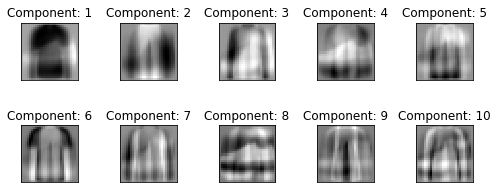

In [18]:
# Q1.5
def iaml01cw2_q1_5():
    pca = PCA()
    pca.fit(Xtrn_nm)
    comp = pca.components_
    
    #make 2x5 grid
    f, axarr = plt.subplots(2,5, figsize = (7,3))
    f.tight_layout()
    
    l = 0
    for i in range(2):
        for j in range(5):
            axarr[i,j].imshow(comp[l].reshape(28,28), cmap = 'gray_r')
            axarr[i,j].set_title("Component: {}".format(l+1))
            axarr[i,j].get_xaxis().set_ticks([])
            axarr[i,j].get_yaxis().set_ticks([])    
            l += 1
        
iaml01cw2_q1_5()   # comment this out when you run the function

In [19]:
# Q1.6
def iaml01cw2_q1_6():
    components = [5,20,50,200]
    #split data into classes to get first sample easier
    classes = np.zeros((10, 6000, 784))
    for i in range(10):
        classes[i] = Xtrn_nm[Ytrn==i]
    
    for i in range(10):
        rmses = []
        for n in components:
            pca = PCA(n_components=n)
            pca.fit(classes[i])
            #reduce dimensionss of first sample of class
            redSamp = pca.transform(classes[i][0].reshape(1,-1))
            # reconstruct sample
            recons = pca.inverse_transform(redSamp).reshape((784,))
            rmse = math.sqrt(mean_squared_error(classes[i][0], recons))
            rmses.append(rmse)
            
            print("RMSE: {:.3f} in class: {} with {} components".format(rmse, i, n))
            
        #or to paste into latex(uncomment)
        #print("{} & {:.3f}\ & {:.3f}\ & {:.3f}\ & {:.3f}\ \\\\".format(i, rmses[0],rmses[1],rmses[2],rmses[3]))

iaml01cw2_q1_6()   # comment this out when you run the function

RMSE: 0.159 in class: 0 with 5 components
RMSE: 0.124 in class: 0 with 20 components
RMSE: 0.090 in class: 0 with 50 components
RMSE: 0.040 in class: 0 with 200 components
RMSE: 0.135 in class: 1 with 5 components
RMSE: 0.072 in class: 1 with 20 components
RMSE: 0.037 in class: 1 with 50 components
RMSE: 0.014 in class: 1 with 200 components
RMSE: 0.145 in class: 2 with 5 components
RMSE: 0.130 in class: 2 with 20 components
RMSE: 0.105 in class: 2 with 50 components
RMSE: 0.064 in class: 2 with 200 components
RMSE: 0.138 in class: 3 with 5 components
RMSE: 0.097 in class: 3 with 20 components
RMSE: 0.076 in class: 3 with 50 components
RMSE: 0.044 in class: 3 with 200 components
RMSE: 0.112 in class: 4 with 5 components
RMSE: 0.098 in class: 4 with 20 components
RMSE: 0.065 in class: 4 with 50 components
RMSE: 0.031 in class: 4 with 200 components
RMSE: 0.151 in class: 5 with 5 components
RMSE: 0.125 in class: 5 with 20 components
RMSE: 0.112 in class: 5 with 50 components
RMSE: 0.077 

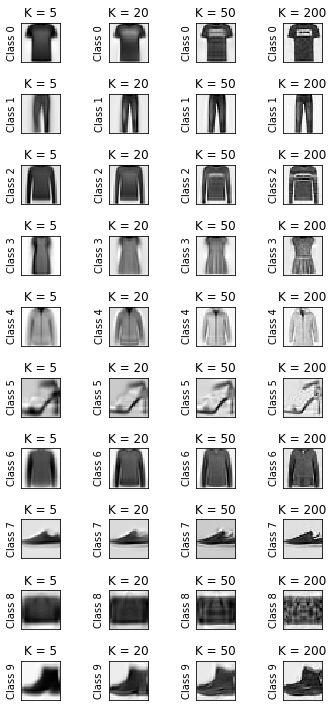

In [5]:
# Q1.7
def iaml01cw2_q1_7():
    components = [5,20,50,200]
    f, axarr = plt.subplots(10,4, figsize = (5,10))
    f.tight_layout()

    #split data into classes to get first sample easier
    classes = np.zeros((10, 6000, 784))
    for i in range(10):
        classes[i] = Xtrn_nm[Ytrn==i]

    for i in range(10):
        j = 0
        for n in components:
            pca = PCA(n_components=n)
            pca.fit(classes[i])
            #reduce dimensions of first sample of class
            redSamp = pca.transform(classes[i][0].reshape(1,-1))
            # reconstruct sample
            recons = pca.inverse_transform(redSamp).reshape((784,))
            recons += Xmean #add mean to reconstructed sample
            axarr[i,j].imshow(recons.reshape(28,28), cmap = 'gray_r')
            axarr[i,j].set_title("K = {}".format(n))
            axarr[i,j].set_ylabel("Class {}".format(i))
            axarr[i,j].get_xaxis().set_ticks([])
            axarr[i,j].get_yaxis().set_ticks([])
            j += 1
iaml01cw2_q1_7()

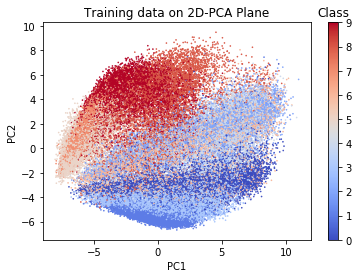

In [25]:
# Q1.8
def iaml01cw2_q1_8():
    #transform data into 2D
    pca = PCA(n_components=2)
    Xtrn_nm_2d = pca.fit_transform(Xtrn_nm)

    plt.title("Training data on 2D-PCA Plane")
    plt.scatter(Xtrn_nm_2d[:,0], Xtrn_nm_2d[:,1], c=Ytrn, s=0.4, cmap='coolwarm')
    clb = plt.colorbar()
    clb.ax.set_title('Class')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

iaml01cw2_q1_8()   # comment this out when you run the function